1. [DynamoDB](#dynamodb)
2. [Traditional Architecture](#traditional-architecture)
3. [DynamoDB Basics](#dynamodb-basics)
4. [DynamoDB - Primary Keys](#dynamodb---primary-keys)
5. [Exercise to choose appropriate attribute for partition key](#exercise-to-choose-appropriate-attribute-for-partition-key)
6. [Hands On - DynamoDB](#hands-on---dynamodb)
7. [Check the DynamoDB table created](#check-the-dynamodb-table-created)
8. [Create item in DynamoDB table](#create-item-in-dynamodb-table)
9. [DynamoDB Throughput - RCU & WCU](#dynamodb-throughput---rcu--wcu)
10. [DynamoDB - Provisioned Mode](#dynamodb---provisioned-mode)
11. [DynamoDB - Write Capacity Units (WCU)](#dynamodb---write-capacity-units-wcu)
12. [DynamoDB - Strongly Consistent Read vs Eventually Consistent Read](#dynamodb---strongly-consistent-read-vs-eventually-consistent-read)
13. [DynamoDB - Read Capacity Units (RCU)](#dynamodb---read-capacity-units-rcu)
14. [DynamoDB - Partitions Internal](#dynamodb---partitions-internal)
15. [DynamoDB - Throttling](#dynamodb---throttling)
16. [DynamoDB - RCU/WCU - On-Demand Mode](#dynamodb---rcuwcu---on-demand-mode)
17. [Hands On - Change Provisioned/On-Demand Modes - Read/Write](#hands-on---change-provisionedon-demand-modes---readwrite)
18. [DynamoDB - Basic Operations](#dynamodb---basic-operations)
19. [DynamoDB - Batch Operation](#dynamodb---batch-operation)
20. [Conditional Writes - DynamoDB Basic](#conditional-writes---dynamodb-basic)
21. [Example on Update Item via CLI](#example-on-update-item-via-cli)
22. [Example on Delete Item via CLI](#example-on-delete-item-via-cli)
23. [DynamoDB - Local Secondary Index (LSI)](#dynamodb---local-secondary-index-lsi)
24. [Hands On - Local Secondary Index](#hands-on---local-secondary-index)
25. [DynamoDB - Global Secondary Index (GSI)](#dynamodb---global-secondary-index-gsi)
26. [Hands On - Global Secondary Index](#hands-on---global-secondary-index)
27. [DynamoDB Indexes and Throttling](#dynamodb-indexes-and-throttling)
28. [DynamoDB - PartiQL](#dynamodb---partiql)
29. [DynamoDB Optimistic Locking](#dynamodb-optimistic-locking)
30. [DynamoDB - DAX](#dynamodb---dax)
31. [DynamoDB DAX vs Elastic Cache](#dynamodb-dax-vs-elastic-cache)
32. [Hands On - DynamoDB DAX](#hands-on---dynamodb-dax)
33. [Check DAX cluster after creation](#check-dax-cluster-after-creation)
34. [DynamoDB Streams](#dynamodb-streams)
35. [Architecture of Data Streams](#architecture-of-data-streams)
36. [DynamoDB Streams & AWS Lambda](#dynamodb-streams--aws-lambda)
37. [Hands On - DynamoDB Streams](#hands-on---dynamodb-streams)
38. [DynamoDB - TTL](#dynamodb---ttl)
39. [Hands On - DynamoDB TTL](#hands-on---dynamodb-ttl)
40. [DynamoDB - CLI](#dynamodb---cli)
41. [Hands On - DynamoDB CLI](#hands-on---dynamodb-cli)
42. [DynamoDB - Transactions](#dynamodb---transactions)
43. [DynamoDB - Capacity Computations](#dynamodb---capacity-computations)
44. [DynamoDB - Session State](#dynamodb---session-state)
45. [DynamoDB - Partition Strategies](#dynamodb---partition-strategies)
46. [DynamoDB - Write Types](#dynamodb---write-types)
47. [DynamoDB - Patterns with S3](#dynamodb---patterns-with-s3)
48. [DynamoDB - Operation](#dynamodb---operation)
49. [DynamoDB - Security](#dynamodb---security)
50. [DynamoDB User interact Directly](#dynamodb-user-interact-directly)

#### DynamoDB:
- No SQL Serverless Database
- AWS fully Managed, high availability Service with replication across multiple AZs
- Supports Automatic Scaling (horizontal)
- Millions of requests per second, trillions of rows and 100s of TBs of storage
- Scales to massive workloads
- Non-Relational database and distributed
- Standard & In-frequent Access Table class
- Enables event driven programming with DynamoDB streams
- Integrated with IAM for security, authorization and administration
- Fast & consistent in performance

No SQL Database:
- Non-Relational databases
- Distributed
- MongoDB, DynamoDB, etc
- Limited support (no query joins, computation, aggregation, etc)
- All data needed for a query is present in one row
- Scales horizontally

#### Traditional Architecture:
- Leverage RDBMS databases
- Use SQL Query Language
- Data to be modeled strongly
- Use query to perform joins, aggregation, computation, etc
- Vertical scaling (getting more powerful CPU, RAM, IO)
- Horizontal scaling (increase reading capability by adding EC2/RDS read replicas)

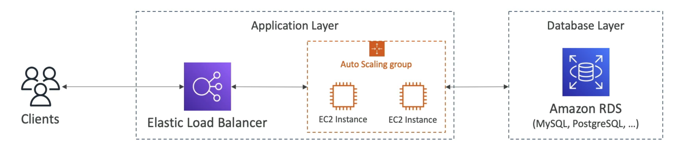

In [30]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/traditional.jpeg')
new_image = img.resize((680, 150))
display(new_image)

#### DynamoDB Basics:
- DynamoDB made of tables
- Each table has primary key
- Each table has infinite number of rows (items)
- Each item has attributes (can be null and added over time)
- Maximum size of an item is 400 KB
- Data types supported:
    - ScalarTypes: String, number, Binary, Boolean, NULL
    - DocumentTypes: List, Map
    - SetTypes: String Set, Number Set, Binary Set

#### DynamoDB - Primary Keys:

Option 1: Partition Key (Hash)
- Partition key must be unique and diverse
- Example "User_Id" for users table

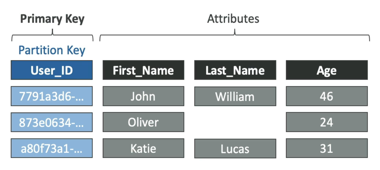

In [31]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/primary_keys.jpeg')
new_image = img.resize((380, 170))
display(new_image)

Option 1: Partition Key + Sort Key (Hash + Range)
- Combination of Partition key + Sort Key must be unique and diverse
- Data is grouped by partition key
- Example: for users_games table "User_Id" for partition and "Game_Id" for Sort Key


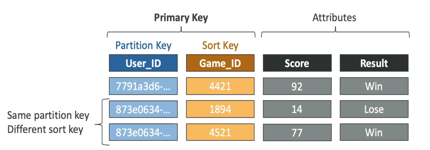

In [32]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/primary_keys1.jpeg')
new_image = img.resize((430, 150))
display(new_image)

#### Exercise to choose appropriate attribute for partition key:
Example:
- Movie Database
    - Movie_id
    - Movie_name
    - Leader_actor_name
    - Movie_language
- Movie_Id is the most appropriate attribute for Partition key since it has high cardinality
- Movie_language is not suitable for Partition Key since there will be duplicate partition keys due to same attribute value repeated

#### Hands On - DynamoDB:
- Go to DynamoDB console
- Create Table
    - Name
    - Partition Key (User_id)
        - binary
        - number
        - string
    - Sort Key (None)
        - binary
        - string
        - number
    - Settings
        - Default
        - Custom *
            - Table class
                - DynamoDB standard
                - DynamoDB standard - IA
            - Capacity Calculator
                - Average Item Size
                - Item Reads/sec
                - Read consistency
                - Item Writes/sec
                - Write consistency
            - Read/Write Capacity settings
                - On-demand
                - Provisioned *
                    - Read capacity
                        - Auto Scaling
                            - On/Off
                        - min capacity units
                        - max capacity units
                        - target utilization
                    - Write capacity
                        - Auto Scaling
                            - On/Off
                        - min capacity units
                        - max capacity units
                        - target utilization
            - Secondary Indexes
                - Create
            - Estimated Cost
            - Encryption
                - At rest
                    - by DynamoDB
                    - AWs Managed keys
                    - Stored in account, owned and managed by us
            - Tags
        - Create    

#### Check the DynamoDB table created:
- Go to DynamoDB console
- Select the DynamoDB table created (User)
    - Overview
        - General Information
        - Item Summary
    - Indexes
    - Monitor
    - Global tables
    - Backup
    - Actions
    - View Items 

#### Create item in DynamoDB table:
- Go to DynamoDB console
- Select the DynamoDB table created
    - View Items
        - Table (User)
            - Scan
                - Table or Index
                - Filters
            - Query
        - View table details
        - Item Returned
            - Create Item
                - follow like the image shown below

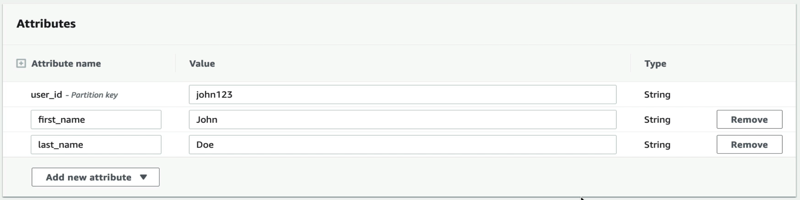

In [33]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/item.jpeg')
new_image = img.resize((800, 200))
display(new_image)

- The User table has only user_id as partition key

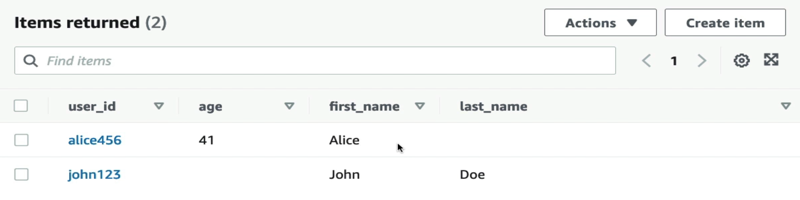

In [34]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/table1.jpeg')
new_image = img.resize((800, 200))
display(new_image)

- The UserPost table has user_id as partition key + post_timestamp as sort Key

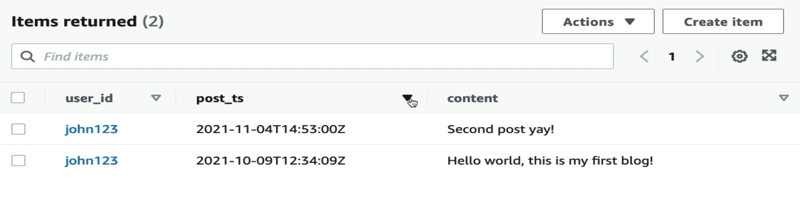

In [35]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/table2.jpeg')
new_image = img.resize((800, 200))
display(new_image)

#### DynamoDB Throughput - RCU & WCU:

Types of Modes:
- Provisioned Mode:
    - Manually specify the Read & Write Capacity units before hand
    - Pay for provisioned

- On-Demand Mode:
    - Automatically scales the Read & Write Capacity units handled by AWS based on workloads
    - No capacity planning
    - Expensive than Provisioned mode

Note:
- Switch between modes every 24 hours


#### DynamoDB - Provisioned Mode:
- Table must have provisioned read and write units
- RCU (Read Capacity Units) & WCU (Write Capacity Units)
- Option to setup auto scaling of throughput to meet demand
- Throughput can be exceeded temporarily using Burst Capacity
- If Burst Capacity has been consumed, result in "ProvisionedThroughputExceededException"
    - Then, perform exponential backoff retry

#### DynamoDB - Write Capacity Units (WCU):
- 1 WCU = 1 write/sec (up to 1 KB in size)
- If item larger than 1 KB, more WCU is consumed 

Example 1: Write 10 items/second, with item size 2 KB
- 20 WCU needed

Example 2: Write 6 items/second, with item size 4.5 KB (item size always rounded to upper whole number i.e 5KB)
- 30 WCU needed

Example 3: Write 120 items/minute, with item size of 2 KB
- 4 WCU needed

#### DynamoDB - Strongly Consistent Read vs Eventually Consistent Read:
- Eventually Consistent Read:
    - If we read after a write, sometimes we will be returned with stale which is not updated with the latest write operation due to replication

- Strongly Consistent Read:
    - If we read after a write, we will always be returned with updated data
    - To Enable Strongly Consistent Read, setup ConsistentRead parameter => True in API calls (GetItem, BatchGetItem, Query, Scan)
    - Consume double RCU

#### DynamoDB - Read Capacity Units (RCU):
- 1 RCU = 1 Strongly Consistent Read/second  or 2 Eventually Consistent Read/second up to items of 4KB
- If items are larger than 4KB, more RCUs are consumed

Example 1: 10 Strongly Consistent Read/second with item size 4KB
- 10 RCUs

Example 2: 16 Eventually Consistent Read/second with item size 12KB
- 24 RCUs

Example 3: 10 Strongly Consistent Read/second with item size 6KB (round up 6 KB to 8 KB)
- 20 RCUs

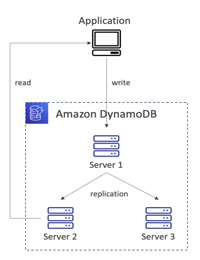

In [36]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/rcu.jpeg')
new_image = img.resize((200, 260))
display(new_image)

#### DynamoDB - Partitions Internal:
- Data is stored in partitions
- Partition keys go through hashing algorithm to know which partition the data to go

To compute the number of partitions:
- By capacity:
    - Number of partitions = (RCUs/3000) + (WCUs/1000)

- By size:
    - Number of partitions = (Total Size/10GB)

- Final partition number = max(Number of partitions by size, Number of partitions by capacity)

Note:
- WCUs & RCUs are spread evenly across partitions

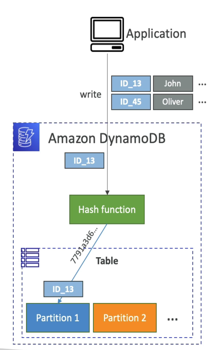

In [37]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/partition.jpeg')
new_image = img.resize((220, 350))
display(new_image)

#### DynamoDB - Throttling:
- If we exceed the RCU & WCU provisioned, it results in "ProvisionedThroughputExceededException"
- Reasons:
    - Hot Keys
    - Hot Partitioning
    - Very Large Items  (RCUs and WCU depend on the item size)
- Solutions:
    - Exponential backoff
    - Distribute partition keys
    - If its RCU issue, use DynamoDB Accelerator (DAX)

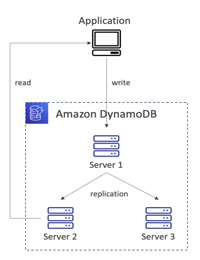

In [38]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/rcu.jpeg')
new_image = img.resize((200, 260))
display(new_image)

#### DynamoDB - RCU/WCU - On-Demand Mode:
- Scales automatically the capacity for read and write
- Read Request Units (RRU) for reading
- Write Request Units (WRU) for writing
- Expensive than Provisioned Mode (2.5x)
- Unlimited RRU & WRU, therefore no throttling
- No capacity planning needed
- Use case: unknown workloads, unpredictable application traffic, etc,.

##### Hands On - Change Provisioned/On-Demand Modes - Read/Write:
- Go to created Dynamo DB table
    - Go to additional settings tab
        - Edit
            - Capacity mode (change)
            - Other configurations
                - RCU
                - WCU

#### DynamoDB - Basic Operations:

Writing Data:
- PutItem:
    - Create a new item or fully replaces the existing item (if same Primary key is used)
    - Consume WCUs

- UpdateItem:
    - Edit existing item or create a new item (if does not exist)
    - Consume WCUs
    - Used to implement Atomic Counters a numeric attribute thats unconditionally incremented

- ConditionalWrites:
    - Accepts a write/update/delete only if the conditions is met, otherwise return an error 
    - Helps concurrent access to items
    - No performance impact

Reading Data:
- GetItem: (return data based on)
    - Read based on Primary Key
    - Primary Key can be HASH or HASH + RANGE
    - Eventually Consistent Read (default)
    - Can also use Strongly Consistent Read (take more RCUs)
    - ProjectionExpression: used to retrieve only certain attributes

- Query: (return data based on)
    - KeyConditionExpression:
        - partition key: (=) is required
        - sort key: (>,<,>=,<=, Between, Begins)

    - FilterExpression:
        - Additional filtering after the query operation

    - Returns of the Query
        - Number of items specified in Limit
        - Or up to 1 MB of data
        - Ability to paginate results
    - Can query a table, Local Secondary Index, Global Secondary Index, etc

- Scan: 
    - Scan the entire table and then filter out data
    - Returns up to 1 MB of data - use pagination to keep reading
    - Consumes a lot of RCUs
    - Limit impact using Limit or reduce the size of the result and pause
    - For faster performance, use parallel scans
        - multiple workers scans multiple segments of data at the same time
        - Increases the throughput and RCU consumed
        - Limit the impact of parallel scans just like Scans
    - Can use ProjectionExpression & FilterExpression (no changes to RCU consumed)

Deleting Data:
- DeleteItem:
    - Delete individual item
    - ability perform conditional delete

- DeleteTable:
    - Delete the whole table and its items
    - Quicker deletion than DeleteItem on all items

##### DynamoDB - Batch Operation:
- Allows to save in Latency i.e. by reducing the number of API calls
- Operations are done in parallel for efficiency
- Part of a batch can failed, which means thats we can retry them
- BatchWriteItem:
    - Up to 25 PutItem AND/OR DeleteItem in one call
    - Up to 16 MB of data written, up to 400 KB per items
    - Can't update items via Batch
    - Use Exponential backoff for failed write items
- BatchGetItem:
    - Up to 100 items in one call or 16 MB of data
    - Items are retrieved in parallel and minimize latency
    - Return items from one or more tables
    - Use Exponential backoff for failed read items

Note:
- The respective DynamoDB APIs are called when we create item (PutItem), Actions -> delete item (DeleteItem), edit item -> Save (UpdateItem), edit item (GetItem)

#### Conditional Writes - DynamoDB Basic:
- For PutItem, DeleteItem, UpdateItem, BatchWriteItem
- Use conditional expression:
    - attribute_exists
    - attribute_not_exists
    - attribute_type
    - contains
    - begins_with
    - ProductCategory IN (:Cat1,:Cat2) and Price between :low and :high
    - size (size of the string)
Note:
- FilterExpressions are for Reads and Conditional Expressions are for Writes

#### Example on Update Item via CLI:

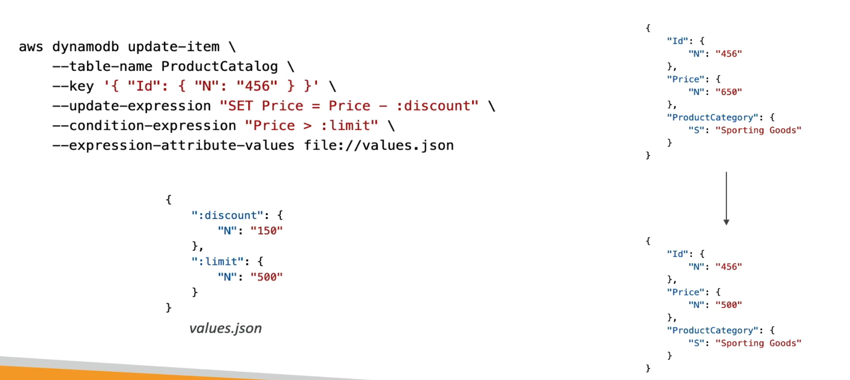

In [39]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/update.jpeg')
new_image = img.resize((850, 380))
display(new_image)

#### Example on Delete Item via CLI:

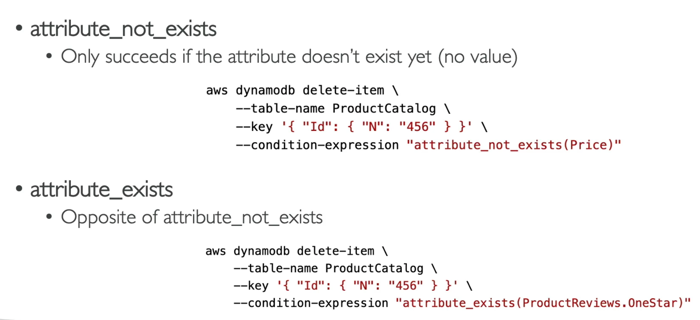

In [40]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/delete.jpeg')
new_image = img.resize((700, 320))
display(new_image)

Conditional Expression - Do not overwrite:
- attribute_not_exists(partition_key)
- attribute_not_exists(partition_key) and attribute_not_exists(sort_key)

Conditional Write - Example Delete Item via CLI Complex condition:

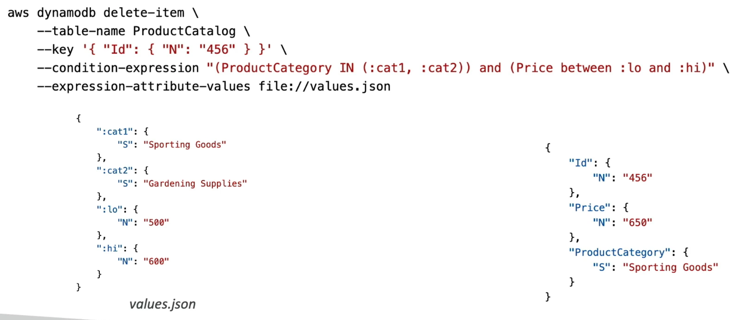

In [41]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/complex.jpeg')
new_image = img.resize((750, 320))
display(new_image)

Conditional Write - Example Delete Item String comparison:
- Begins with
- Contains

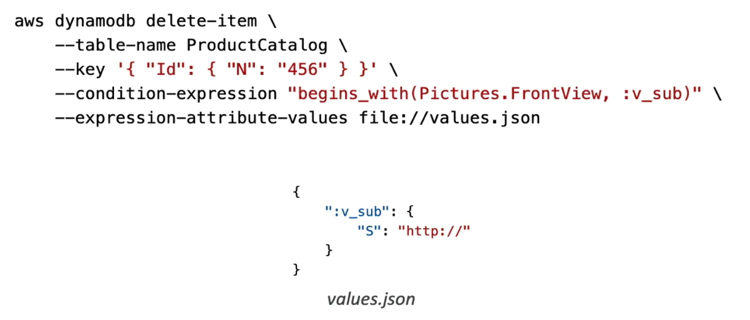

In [42]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/string.jpeg')
new_image = img.resize((750, 320))
display(new_image)

#### DynamoDB - Local Secondary Index (LSI):
- Give alternate Sort Key for the table (partition key remains the same)
- Sort Key consist of on Scalar attribute
- Up to 5 LSIs per table
- Must be defined at table creation time
- Can have Attribute Projections: can contain some or all attributes of the table
    - KEYS_ONLY
    - INCLUDE_ALL

Example of LSI
- We already have Partition Key (user_id) + Sort Key (game_id) for game_user table
- But if we want to fetch the result for a specific user_id with game_timestamp (game_tz)
    - Then create LSI for game_timestamp (game_ts)


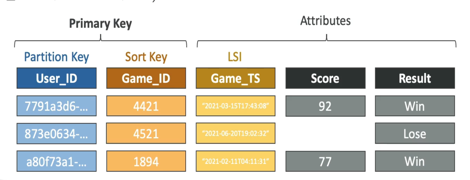

In [43]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/lsi.jpeg')
new_image = img.resize((470, 180))
display(new_image)

##### Hands On - Local Secondary Index:
- Go to DynamoDB console
    - Only possible during table creation
        - Go to Secondary Indexes
            - Create Local Secondary Index
                - Choose Sort Key

#### DynamoDB - Global Secondary Index (GSI): 
- Can have different Primary Key (either Partition Key or Partition Key + Sort Key)
- Speed up queries on non key attributes
- The Index Key consist of scalar attributes (string, number, binary) 
- Can have Attribute Projections: can contain some or all attributes of the table
    - KEYS_ONLY
    - INCLUDE_ALL
- Must provision index for WCU & RCU
- GSI can be created or modified after table creation

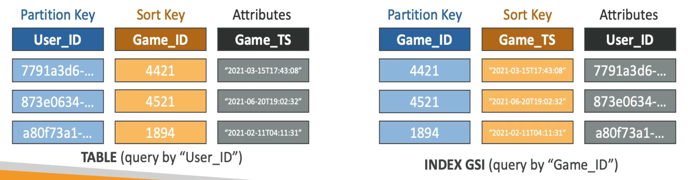

In [44]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/gsi.jpeg')
new_image = img.resize((690, 180))
display(new_image)

##### Hands On - Global Secondary Index:
- Go to DynamoDB console
    - During or After the table has been already created
        - Go to Secondary Indexes
            - Create Global Secondary Index
                - Choose Partition Key
                - Choose Sort Key

##### DynamoDB Indexes and Throttling:

GSI:
- If write on GSI is throttled then the main table is also throttled even if WCU look fine for main table
- Choose GSI primary key carefully
- Choose WCU carefully

LSI:
- They use the main tables WCU and RCU
- No throttling considerations

#### DynamoDB - PartiQL:
- SQL compatible query language for DynamoDB
- Allows us to SELECT, UPDATE, DELETE, INSERT data into DynamoDB via SQL
- Supports Batch operations
- Run queries across multiple DynamoDB tables
- Run PartiQL queries from:
    - AWS console
    - SDK
    - CLI
    - NoSQL WorkBench for DynamoDB
    - DynamoDB API

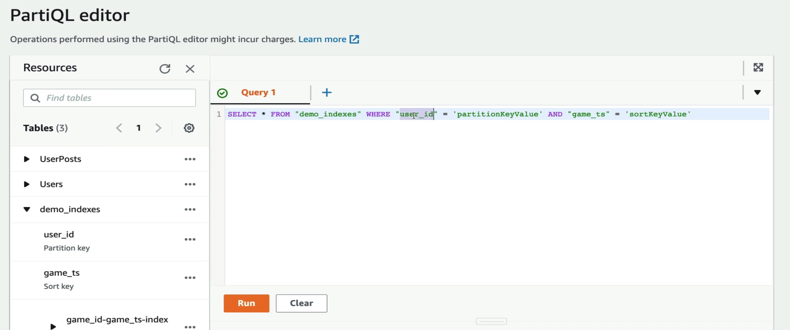

In [45]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/partiql.jpeg')
new_image = img.resize((790, 330))
display(new_image)

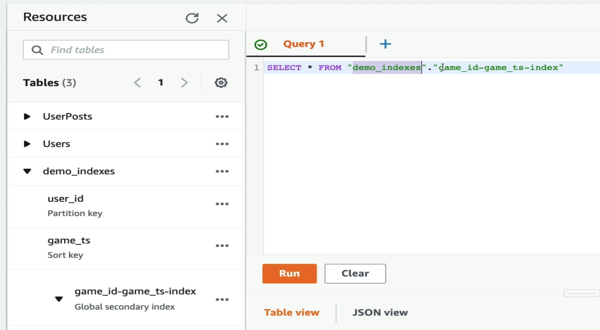

In [46]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/partiql1.jpeg')
new_image = img.resize((600, 330))
display(new_image)

#### DynamoDB Optimistic Locking:
- DynamoDB has a feature called conditional writes
    - a strategy to ensure the item hasn't been changed before updating or deleting it
- Each item has an attribute that acts like a version number

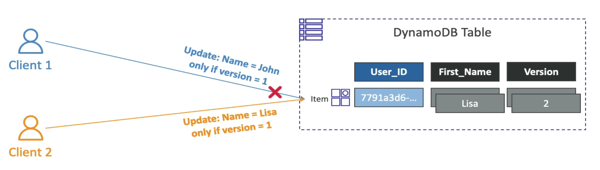

In [47]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/locking.jpeg')
new_image = img.resize((600, 170))
display(new_image)

#### DynamoDB - DAX:
- Fully managed, highly available, seamless in-memory cache for DynamoDB
- Microseconds latency for cache reads and queries
- Does not require application logic modification
    - compatible with existing DynamoDB APIs
- 5 mins TTL for cache
- Solves Hot Key problem
- Multi-AZ (3 nodes minimum for production)
- Secure (IAM, Encryption at rest via KMS, CloudTrail, VPC, etc,.)

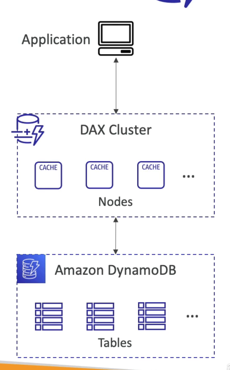

In [48]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/dax.jpeg')
new_image = img.resize((230, 370))
display(new_image)

#### DynamoDB DAX vs Elastic Cache:
- DynamoDB Dax:
    - Individual Object cache
    - Query & Scan Cache

- Elastic Cache:
    - Store Aggregated, computation heavy results

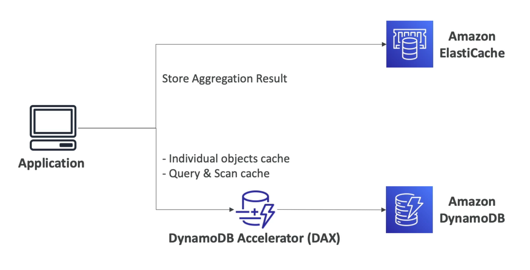

In [49]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/dax2.jpeg')
new_image = img.resize((530, 270))
display(new_image)

#### Hands On - DynamoDB DAX:
- Go to DynamoDB console
    - Go to Cluster (left-side) under the DAX option
        - Create Cluster
            - Name
            - Node Families
                - All
                - r-type (fixed resources)
                - t-type (support bursting i.e. above the baseline units if needed)
            - Node type
                - dax.r5.large
                - dax.r5.4xlarge
                - dax.r5.8xlarge
                - etc
            - Cluster size
                - (at least 3 nodes for multi-AZ availability)
            - Subnets Groups
                - Create
                    - Name
                    - VPC_ID
                    - Subnets
                - Existing
            - Access Control
                - Security Group (default vpc) - drop-down
                    - To access DAX cluster from application, add inbound access on port 8111 or 9111 if encrypted in transit
            - AZ Allocation
                - automatic
                - manual
            - IAM permissions
                - service role for DynamoDB
                    - Choose existing
                    - Create a new one
                        - IAM role name
                        - Create Policy
                        - IAM role policy
                            - Read/write 
                            - Read only
                        - IAM Policy Name
                        - Access to DynamoDB tables
                            - All
                            - Specific tables
            - Encryption
                - At Rest
                - In transit
            - Parameter groups (set of configurations applied to nodes in the cluster)
                - Existing
                - Create new one
                    - version
                    - details
                        - description
                        - TTL info (5 mins)
                            - Item
                            - Query
            - Maintenance window
                - No specific window
                - specific window
            - Tags
            - Create

##### Check DAX cluster after creation:
- Go into the created DAX cluster
- Check the cluster endpoint from DAX cluster overview tab
    - for the application to leverage for accessing data in DynamoDB


#### DynamoDB Streams:
- Ordered stream of item-level modifications (create/update/delete) in a table
    - captures the list of modification performed in DynamoDB as a stream to perform analytics, debugging, etc
- Records can be sent to:
    - Kinesis Data Streams
    - Lambda function
    - KCL (Kinesis Client Library)
- Data retention is up to 24 hours
- Use cases:
    - React to changes real-time (welcome email to new users)
    - Analytics
    - insert into derivative tables
    - Insert into OpenSearch service
    - implement cross region replication
- Ability to choose what information to be written into the DynamoDB streams
    - KEYS_ONLY => only specific keys to be captured
    - OLD_IMAGE => capture whole item after its modified
    - NEW_IMAGE => capture whole item before its modified
    - OLD_AND_NEW_IMAGES => both
- DynamoDB streams are also made of shards like Kinesis Data Streams
- The shards are automatically provisioned by AWS
- Records are not retroactively populated in streams after enabling it

#### Architecture of Data Streams:

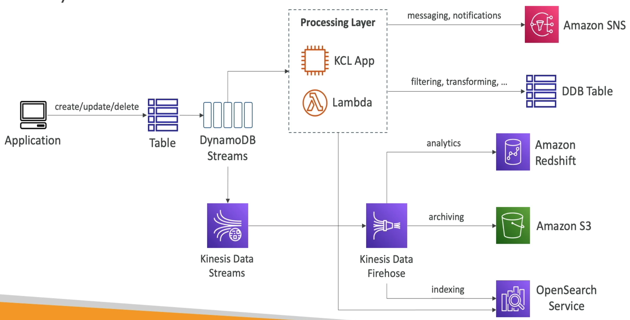

In [50]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/streams.jpeg')
new_image = img.resize((630, 320))
display(new_image)

#### DynamoDB Streams & AWS Lambda:
- Define Event source mapping to read from DynamoDB streams
- Ensure Lambda has proper IAM permissions
- Lambda function is invoked synchronously

##### Hands On - DynamoDB Streams:
- Go to DynamoDB console
    - Go into the table created
        - Go to Exports and Streams tab (right-side)
            - Scroll to DynamoDB Streams
                - Enable
                    - View Type
                        - New Image
                        - Old Image
                        - Keys attributes Only
                        - New and Old Image
                - If enabled trigger option will be available (Lambda)
                    - Create Trigger
                        - Create a Lambda function
                            - Use Blueprints (DynamoDB-AWSLambda)
                            - Create Lambda role with basic permissions
                            - DynamoDB Trigger
                                - Table
                                - Batch Size
                                - Batch Window
                                - Starting Position
                            - Create Function
                        - Choose the created Lambda function (drop-down)
                        - Batch size
                        - Create Trigger
            - Scroll to Kinesis Data Streams
                - Enable

Note:
- Ensure the proper IAM permissions are attached to the AWS Lambda execution Role (DynamoDB Read/Execution Policy)
- To check for item modification logs (Insert/Update/Delete) in CloudWatch log since the trigger AWS Lambda is setup

#### DynamoDB - TTL:
- Automatically delete items after an expiry timestamp
- Does not consume any WCU
- TTL must be scalar type with numeric values of Unix Epoch timestamp
- Expired items are deleted after 48 hours of expiration
- Expired items that haven't been deleted appears in queries, scans, reads 
    - if we don't want expired items, we can exclude them by using filter expressions
- When items are deleted they are also deleted from LSI/GSI
- Delete operation of each expired item in DynamoDB enters the DynamoDB streams (deleted items can be recovered)
- Use case:
    - Keep current data and reduce storage space
    - Adhere to regulatory obligations

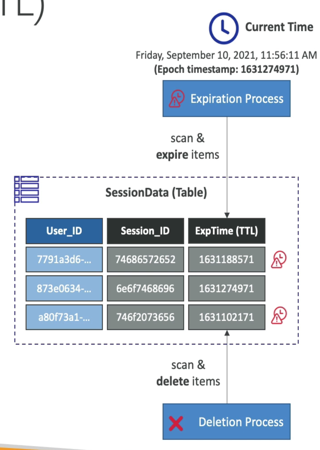

In [51]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/ttl.jpeg')
new_image = img.resize((320, 450))
display(new_image)

Above Process Explained:
- First the DynamoDB send a scan to set the expiration time
- The second scan sent by DynamoDB is to scan and delete the records in DynamoDB after Expiration

#### Hands On - DynamoDB TTL:
- Go to DynamoDB console
    - Create table
        - Partition key (user_id)
        - Create
    - Create Item inside the created table (Users)
        - attribute
            - user_id
        - Value
            - john123
        - Type
            - String
        - Add new attributes
            - attribute
                - date
            - Value
                - 1229711998 (Unix Epoch Timestamp)
            - Type
                - String
    - Go to Additional Settings inside the created table
        - Scroll down to TTL
            - Enable
                - TTL attribute (date/timestamp needed)
                - Simulations
            - Enable


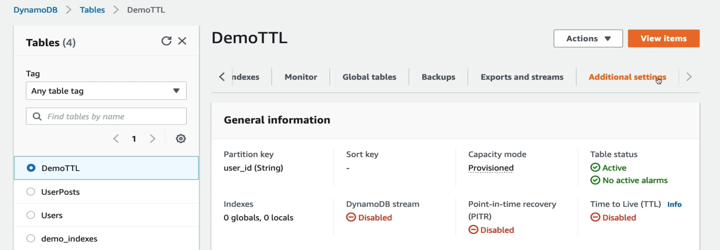

In [52]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/ttl1.jpeg')
new_image = img.resize((720, 250))
display(new_image)

#### DynamoDB - CLI:
- --projectionexpression (specifically choose one or more attributes to retrieve)
- --filterexpression (filter items before returned)

General AWS CLI Pagination options: (DynamoDB, S3, etc,.)
- --page-size: specify AWS CLI retrieves the full list of items but with a larger number of API calls instead of one API calls (default 100 items)
- --max-items: max no. of items to show in the CLI (returns NextToken)
- --starting-token: specify the last NextToken to return next set of items 

Note:
- Suppose we have a dataset of 10000 items and if we specify --page-size=100, the it will create 100 API calls
    - If we don't specify --page-size value or keep as 1 then the read will result in error due to timeout

##### Hands On - DynamoDB CLI:
- Go to CloudShell terminal to execute the DynamoDB CLI commands

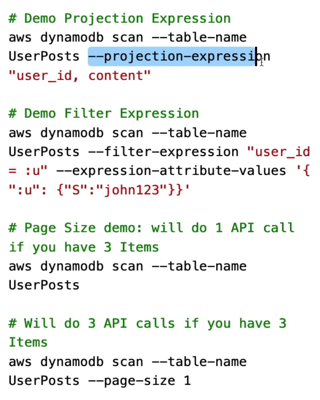

In [53]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cli.jpeg')
new_image = img.resize((320, 400))
display(new_image)

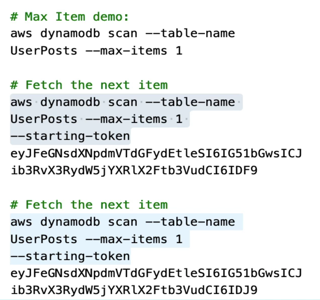

In [54]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cli2.jpeg')
new_image = img.resize((320, 300))
display(new_image)

#### DynamoDB - Transactions:
- Coordinated All or nothing operation (add,update,delete) to multiple items across one or more tables
- Provide Atomicity, Isolation, Consistency, Durability (ACID)
- Read Modes: Eventually Consistent, Strongly Consistent, Transactional
- Write Modes: Standard, Transactional
- Consumed 2X WCUs & RCUs
    - performs 2 operations for every item
    - TransactGetItem: one or more GetItems operation
    - TransactWriteItem: one or more PutItems, UpdateItems, DeleteItems operation
- Use case:
    - financial transactions, managing orders, multiplayer games, etc

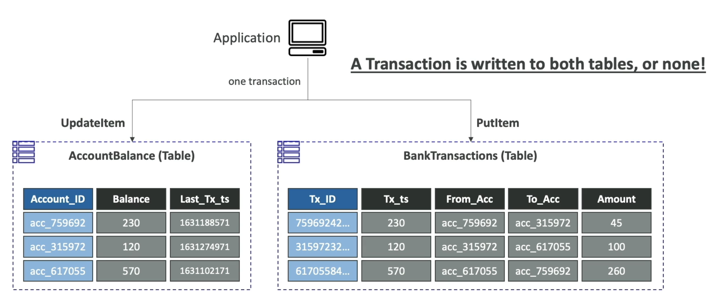

In [55]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/transaction.jpeg')
new_image = img.resize((720, 300))
display(new_image)

#### DynamoDB - Capacity Computations:

Example 1: 3 Transaction writes per second, item size of 5 KB
- 30 WCUs => (3 * (5 KB/1 KB) * 2)

Example 1: 5 Transaction reads per second, item size of 5 KB
- 20 RCUs => (5 * 2 * (8 KB/ 4 KB)) i.e. 5 KB gets round of to 8 KB (nearest multiples of 4 MB value)


#### DynamoDB - Session State:
- Common to use DynamoDB to store sessions cache state
- ElasticCache: 
    - is in-memory whereas DynamoDB DAX is serverless and automatic scaling
    - Both Key/Value stores
- EFS:
    - EFS attached to EC2 instance as a network drive
- EBS & Instance Store:
    - can be only used for local caching and not shared caching
- S3:
    - S3 higher latency and not meant for small objects

#### DynamoDB - Partition Strategies:

Write Sharding:
- Image we have an voting application with two candidates A & B
- If the Partition_Key is just candidate_id then it will result in Hot Partitioning
- Strategy thats allows better distributions of items evenly across partitions
    - add suffixes to Partition Key value
    - 2 methods:
        - Sharding using Random Suffix
        - Sharding using Calculated Suffix

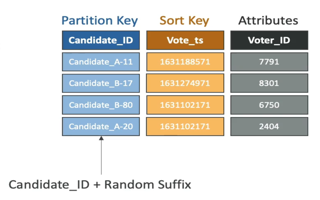

In [57]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/sharding.jpeg')
new_image = img.resize((320, 200))
display(new_image)

#### DynamoDB - Write Types:
- concurrent
- atomic
- conditional
- batch

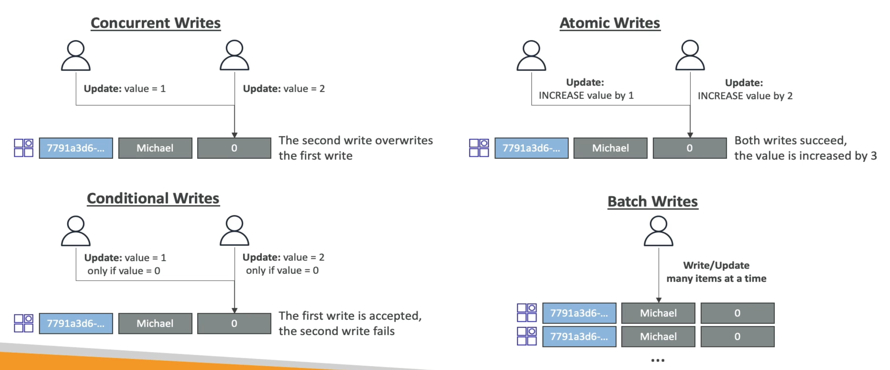

In [58]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/writes.jpeg')
new_image = img.resize((890, 370))
display(new_image)

#### DynamoDB - Patterns with S3:

Large Objects Pattern (eg: image files):
- usually large image files are not stored in DynamoDB instead stored in S3 and their metadata is stored in DynamoDB
    - metadata are:
        - product ID
        - product name
        - S3 url

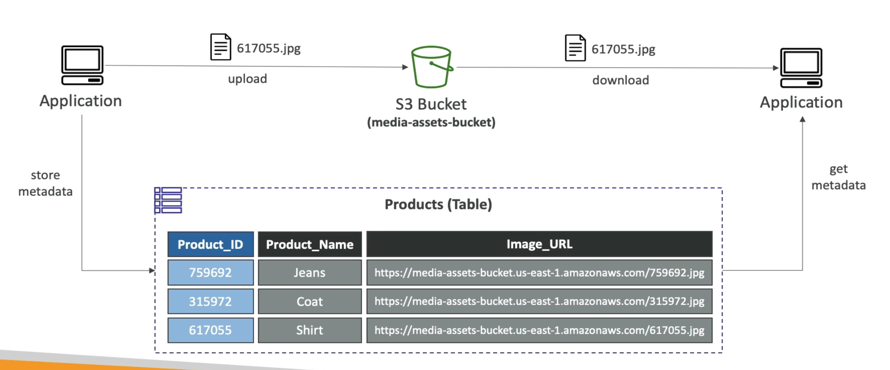

In [59]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/patterns.jpeg')
new_image = img.resize((890, 370))
display(new_image)

Indexing S3 Object Metadata:

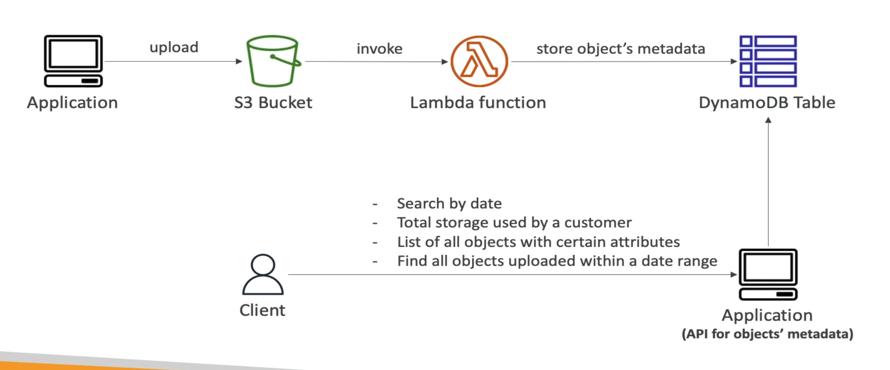

In [60]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/patterns2.jpeg')
new_image = img.resize((890, 370))
display(new_image)

#### DynamoDB - Operation:

Table Cleanup:
- Option 1: Scan + DeleteItem
    - very slow, consumes RCU and WCUs, expensive
- Option 2: Drop Table + Recreate Table
    - fast & efficient and cheap

Copying DynamoDB table - across Accounts, Regions, AZs:
- Option 1: Use AWS DataPipeline
    - AWS DataPipeline will launch EMR cluster to read data from DynamoDB tables
    - EMR cluster will write data to S3
    - Then, use AWS DataPipeline to read data from S3 and write to new DynamoDB tables

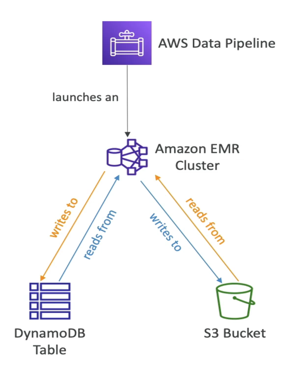

In [62]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/operations.jpeg')
new_image = img.resize((290, 370))
display(new_image)

- Option 2: Backup and restore into new table (most efficient, since it doesn't require any external services)
    - takes some time
- Option 3: Scan + PutItem or BatchWriteItem
    - write own code to perform

#### DynamoDB - Security:
- has VPC
- uses IAM permissions to access DynamoDB tables and services
- Encryption at rest (KMS) and transit (SSL/TLS)
- Backup and restore feature available:
    - Point in time recovery
    - No performance impact
- Global Tables:
    - Multi-Region, Multi-Active, Fully replicated, High performance
        - To enable it, use DynamoDB streams
- DynamoDB Local:
    - Develop and test apps locally without accessing DynamoDB web service (through internet)
- To migrate data from DynamoDB:
    - Use AWS Database Migration Service 
        - DynamoDB to MongoDB
        - DynamoDB to S3
        - DynamoDB to Oracle
        - DynamoDB to MySQ
        - etc

#### DynamoDB User interact Directly:

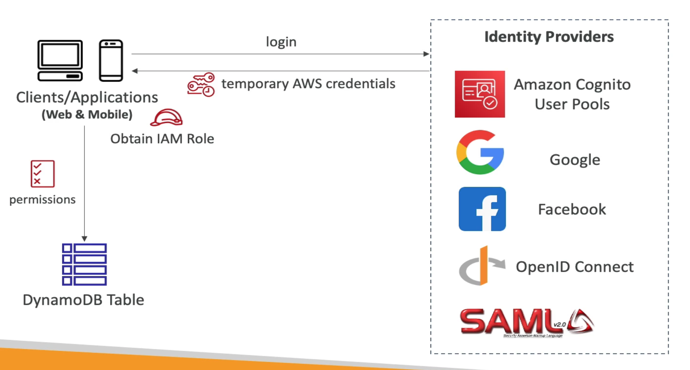

In [63]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/userinteract.jpeg')
new_image = img.resize((690, 370))
display(new_image)

##### The Above Process:
- Client use Identity Providers (like Web Identity Federation or Cognito Identity Pools) to login
- The Identity providers send back the temporary AWS credentials for user
- The temporary AWS credentials returned by Identity Providers for a user have IAM role associated to it
- The IAM role has restrictive access via IAM permission policy to limit access to DynamoDB APIs (IAM Permission Policy shown below)
    - To enable fine-grain control of data, 
        - IAM Permission Policy has a condition
            - LeadingKeys: limit row-level access for users on Primary Key
            - Attributes: limit specific attributes for the user to see
- If the user using the client application have satisfied the IAM permissions then the access will be granted to DynamoDB to the Data they have permissions to.


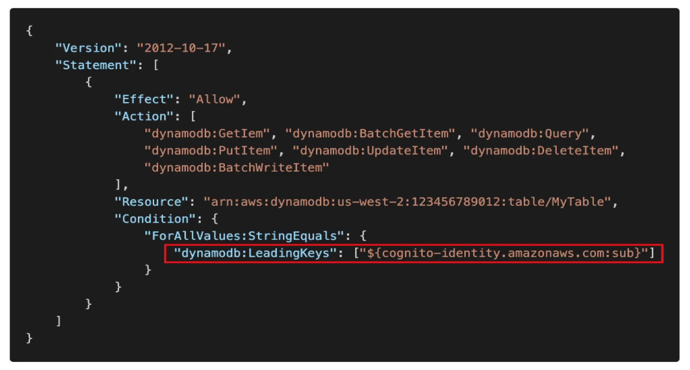

In [61]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/leading_keys.jpeg')
new_image = img.resize((690, 370))
display(new_image)